In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series

# 과정

## 이전 과제에서 만든 함수 (수정)

1.   total_energy개선 적용
2.   새로운 베타에서 실행할 때, (랜덤으로 초기화 하지 않고) 이전 베타에서의 어레이 사용

In [ ]:
import numpy as np

# 주어진 격자에서 주어진 위치의 오른쪽, 위쪽, 왼쪽, 아래쪽 이웃 위치를 반환하는 함수
def local(L, num):
    right = num + 1
    if right % L == 0:
        right -= L

    left = num - 1
    if (left + 1) % L == 0:
        left += L

    up = num - L
    if up < 0:
        up += L * L

    down = num + L
    if down >= L * L:
        down -= L * L

    return np.array([right, up, left, down])

# 주어진 격자에서 주어진 위치의 상호작용 에너지를 계산하는 함수
def local_E(arr, num):
    L = int(np.sqrt(len(arr)))  # 격자의 한 변의 길이 계산
    neighbors = arr[local(L, num)]  # 주어진 위치의 이웃들의 값 가져오기
    return -np.sum(neighbors) * arr[num]  # 주어진 위치의 에너지 계산

# 전체 격자의 전체 에너지를 계산하는 함수
def total_energy(S):
    L = int(np.sqrt(len(S)))  # 격자의 한 변의 길이 계산
    SS = S.reshape(L, L)  # 1차원 배열을 2차원 격자 형태로 변환

    # 각 방향으로 밀어서 구현함
    SS1 = np.insert(SS, 0, SS[L-1, :], axis=0)
    SS1 = np.delete(SS1, L, axis=0)

    SS2 = np.insert(SS, L, SS[0, :], axis=0)
    SS2 = np.delete(SS2, 0, axis=0)

    SS3 = np.insert(SS, 0, SS[:, L-1], axis=1)
    SS3 = np.delete(SS3, L, axis=1)

    SS4 = np.insert(SS, L, SS[:, 0], axis=1)
    SS4 = np.delete(SS4, 0, axis=1)

    SS_sum = SS1 + SS2 + SS3 + SS4  # 네 방향의 합을 구함
    return -np.sum(SS * SS_sum) / 2  # 전체 에너지를 계산하여 반환

# 주어진 위치에서의 에너지 변화를 계산하는 함수
def delta_E(arr, number):
    L = int(np.sqrt(len(arr)))  # 격자의 한 변의 길이 계산
    return 2 * arr[number] * np.sum(arr[local(L, number)])  # 주어진 위치의 에너지 변화를 계산하여 반환


In [ ]:
import numpy as np

def spin_E_change(beta, L, t, prepared_arr=None):
    delta_m4 = np.exp(beta * (-4))  # 미리 계산된 delta_m4
    delta_m8 = np.exp(beta * (-8))  # 미리 계산된 delta_m8

    # 초기 스핀 설정
    if prepared_arr:
        S = np.array(prepared_arr)  # 주어진 초기 스핀 배열 사용
    else:
        random_arr = np.random.randn(L * L)  # 평균 0, 표준 편차 1의 정규 분포를 따르는 난수 배열 생성
        S = random_arr / abs(random_arr)  # 스핀 값 설정 (-1 또는 1)

    E_S = total_energy(S)  # 초기 에너지 계산
    m = np.sum(S) / len(S)  # 초기 자화 모멘트 계산 (스핀의 평균)

    E_list = [E_S]  # 에너지 리스트 초기화
    m_list = [m]  # 자화 모멘트 리스트 초기화
    S_list = [S]  # 스핀 상태 리스트 초기화

    for _ in range(t):
        U = S.copy()  # 현재 스핀 상태 복사
        number = np.random.choice(len(S))  # 무작위로 하나의 스핀을 선택
        U[number] *= -1  # 선택된 스핀을 반전

        # 새로운 상태 U의 에너지 및 자화 모멘트 계산
        delta = delta_E(S, number)  # 선택된 스핀의 에너지 변화
        E_U = E_S + delta  # U의 총 에너지

        # Metropolis 알고리즘을 사용하여 상태 전이 결정
        if delta <= 0:
            accept_S_to_U = 1  # 에너지가 낮아지면 항상 전이
        else:
            if delta == 4:
                accept_S_to_U = delta_m4
            elif delta == 8:
                accept_S_to_U = delta_m8
            else:
                print('error, delta=', delta)  # 예상치 못한 delta 값 오류 처리

        # 전이를 수락하고 새로운 상태를 반영
        if np.random.random() < accept_S_to_U:
            S = U.copy()
            E_S = E_U.copy()
        m = np.sum(S) / len(S)  # 업데이트된 자화 모멘트 계산

        # 결과 리스트에 추가
        E_list.append(E_S)
        m_list.append(m)
        S_list.append(S)

    return E_list, m_list, S_list


## 0.35~0.55구간에서 자세하게 그래프가 그려지도록 범위를 설정 (L=5일때의 경우)

In [ ]:
print(np.array(range(4))*0.1)
print(np.array(range(1,22))*0.01+0.34) #0.35~0.55는 0.01 간격
print(np.array(range(5))*0.1+0.6)

beta_list = list(np.array(range(4))*0.1) + list(np.array(range(1,22))*0.01+0.34) + list(np.array(range(5))*0.1+0.6)

[0.  0.1 0.2 0.3]
[0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48
 0.49 0.5  0.51 0.52 0.53 0.54 0.55]
[0.6 0.7 0.8 0.9 1. ]


In [ ]:
L=5
t=10500

In [ ]:
E_m_list, m_m_list = [], []  # 각 베타에 대한 평균 에너지와 평균 자화 모멘트를 저장할 리스트
E_lists = []  # 각 베타에서의 에너지 리스트를 저장할 리스트

for beta in beta_list:
    # 각 베타 값에 대해 spin_E_change 함수를 호출하여 시뮬레이션 결과를 받아옴
    E_list, m_list, S_list = spin_E_change(beta, L, t)

    # 시뮬레이션 결과에서 평균 에너지와 평균 자화 모멘트 계산
    E_mean = np.sum(E_list[500:]) / (t - 500)  # 처음 500 단계는 평형 상태에 도달하기까지의 초기화 단계로 간주하지 않음
    m_mean = np.sum(m_list[500:]) / (t - 500)

    # 계산된 평균 값을 리스트에 추가
    E_m_list.append(E_mean)
    m_m_list.append(m_mean)

    # 시뮬레이션 도중의 에너지 리스트를 500번째 인덱스부터 끝까지 잘라서 저장
    E_lists.append(E_list[500:])


Text(0, 0.5, 'E_mean')

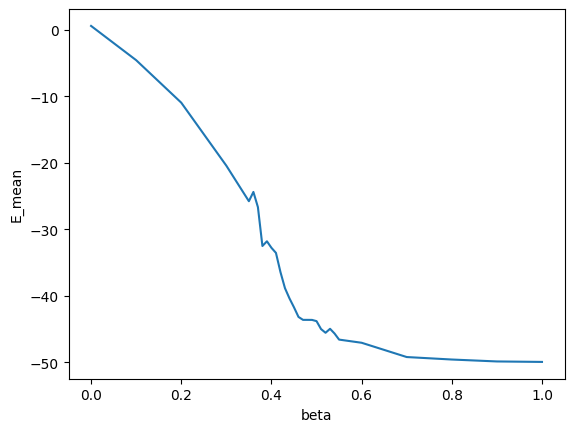

In [ ]:
plt.plot(beta_list, E_m_list)

plt.xlabel('beta')
plt.ylabel('E_mean')

In [ ]:
#표준오차

std_list=[]
for E_list in E_lists[::]:
    x_list = E_list[500:]
    S = Series(x_list)
    s_list=[]
    for i in range(500):
      s_list.append(S.autocorr(i))

    for i in range(len(s_list)):
      if s_list[i] < 0.1:
        tau = i*5 #i번째에 0.1보다 작은 상관계수
        break
      if i == len(s_list)-1:
        print('error 0.1보다 작은 상관계수가 없음')

    print(tau)
    sample = E_list[500:][::tau]
    s_std = np.std(sample)
    s_stderror = s_std/np.sqrt(len(sample)-1)
    print(s_stderror)

    std_list.append(s_stderror)

70
0.6372146794747038
90
0.7680493550738287
210
1.1594202898550723
595
3.511884584284246
2295
3.3466401061363023
950
2.5764348485699418
850
4.4164522532288855
1955
6.374950980203691
1080
3.637934565276644
900
3.0683669977787615
2340
8.818163074019441
1410
3.688555567816588
575
2.4225012096440004
830
3.859920970562726
455
1.4986010104968341
415
1.524277949916895
455
2.216409631663064
710
2.1277858274442303
545
1.62496857687064
1190
1.7627089541790095
510
1.5374668280846768
615
1.973786547054502
1000
3.991101212558871
530
1.2207358757861477
455
0.856084002066447
1205
2.47847879612821
275
0.31845967818022214
275
0.2285714285714286
150
0.1875
190
0.1568627450980392


<ErrorbarContainer object of 3 artists>

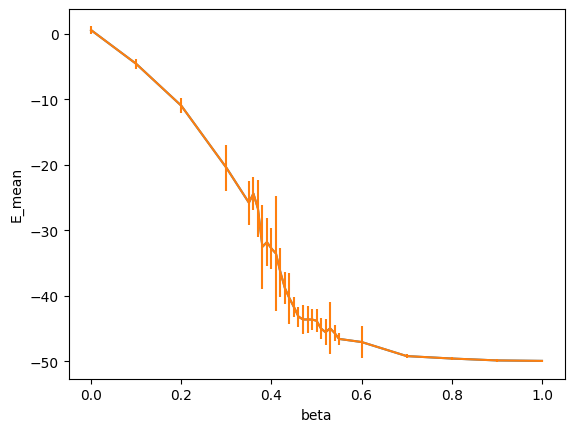

In [ ]:
plt.plot(beta_list, E_m_list)

plt.xlabel('beta')
plt.ylabel('E_mean')

plt.errorbar(beta_list[::], E_m_list[::], std_list)

## L=5,10,20 비교

In [ ]:
#E_mean_vs_beta 와 m_mean_vs_beta 둘 다 계산

def E_mean_m_mean_vs_beta(L,t,cut,find_tau_time = t):
    E_m_list, m_m_list = [],[]
    E_lists, m_lists = [],[] ##표본 저장

    beta_list = list(np.array(range(4))*0.1) + list(np.array(range(1,22))*0.01+0.34) + list(np.array(range(5))*0.1+0.6)
    prepared_arr = None
    for beta in beta_list:
      print('{:.2f}'.format(beta), end=',')
      E_list, m_not_abs, S_list = spin_E_change(beta, L, t, prepared_arr)
      m_abs = np.abs(m_not_abs)

      E_mean = np.sum(E_list[cut:])/(t-cut)
      m_mean = np.sum(m_abs[cut:])/(t-cut)

      E_m_list.append(E_mean)
      m_m_list.append(m_mean)

      E_lists.append(E_list[cut:]) #cut부터 잘라서 저장
      m_lists.append(m_not_abs[cut:]) #cut부터 잘라서 저장

      prepared_arr = list(S_list[-1])

    print('',end='\n')
    #tau 구하기
    E_std_list, m_std_list = [],[]
    for i in range(len(E_lists)):
        print('({}/{})'.format(i,len(E_lists)), end=',')
        E_l = E_lists[i]
        S = Series(E_l)
        tau=find_tau_time
        for j in range(find_tau_time):
          if S.autocorr(j) < 0.1:
            tau = j*3
            tau_error = True
            break
        print('tau' , tau)
        #E에 대한 표준오차 구하기
        sample_E = E_l[tau::tau]
        std_E = np.std(sample_E)
        stderror_E = std_E/np.sqrt(len(sample_E)-1)
        E_std_list.append(stderror_E)

        #m에 대한 표준오차 구하기
        m_l = m_lists[i]

        sample_m = m_l[tau::tau]
        std_m = np.std(sample_m)
        stderror_m = std_m/np.sqrt(len(sample_m)-1)
        m_std_list.append(stderror_m)



    plt.plot(beta_list, E_m_list)
    plt.xlabel('beta')
    plt.ylabel('E_mean')
    plt.errorbar(beta_list, E_m_list, E_std_list)
    plt.show()
    plt.plot(beta_list, m_m_list)
    plt.xlabel('beta')
    plt.ylabel('m_mean')
    plt.errorbar(beta_list, m_m_list, m_std_list)
    plt.show()

    return beta_list, E_m_list, m_m_list, E_std_list, m_std_list

### L=5

0.00,0.10,0.20,0.30,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.60,0.70,0.80,0.90,1.00,
(0/30),tau 39
(1/30),tau 66
(2/30),tau 144
(3/30),tau 324
(4/30),tau 525
(5/30),tau 579
(6/30),tau 684
(7/30),tau 576
(8/30),tau 729
(9/30),tau 564
(10/30),tau 657
(11/30),tau 516
(12/30),tau 681
(13/30),tau 729
(14/30),tau 834
(15/30),tau 576
(16/30),tau 576
(17/30),tau 642
(18/30),tau 558
(19/30),tau 654
(20/30),tau 645
(21/30),tau 492
(22/30),tau 312
(23/30),tau 552
(24/30),tau 318
(25/30),tau 336
(26/30),tau 342
(27/30),tau 237
(28/30),tau 228
(29/30),tau 177


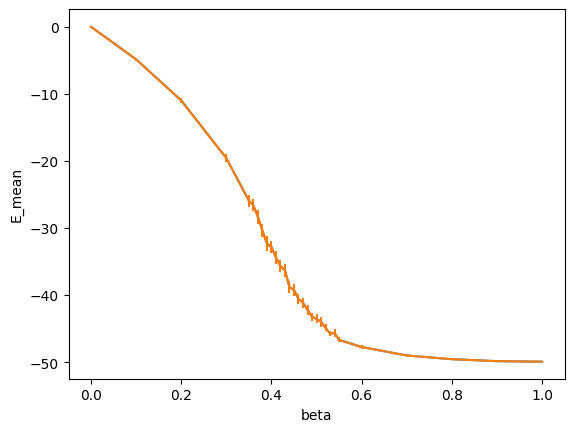

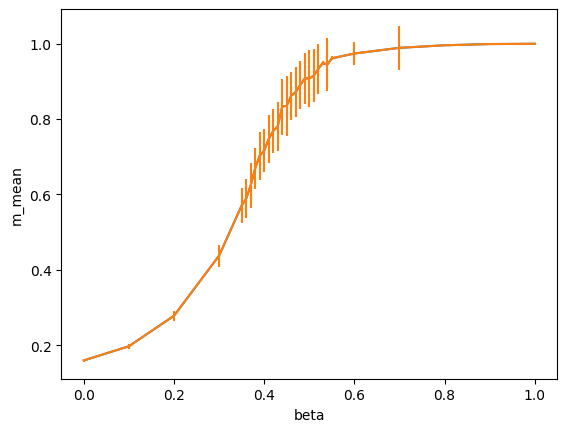

In [ ]:
L=5
t=100000
cut = 500

beta_list_0, E_m_list_0, m_m_list_0, E_std_list_0, m_std_list_0 = E_mean_m_mean_vs_beta(L,t,cut)

### L=10

0.00,0.10,0.20,0.30,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.60,0.70,0.80,0.90,1.00,
(0/30),tau 168
(1/30),tau 288
(2/30),tau 435
(3/30),tau 1509
(4/30),tau 3828
(5/30),tau 2955
(6/30),tau 5217
(7/30),tau 12087
(8/30),tau 4689
(9/30),tau 5535
(10/30),tau 5175
(11/30),tau 4281
(12/30),tau 10491
(13/30),tau 6636
(14/30),tau 19560
(15/30),tau 5367
(16/30),tau 3150
(17/30),tau 1782
(18/30),tau 3042
(19/30),tau 1812
(20/30),tau 4062
(21/30),tau 2247
(22/30),tau 1428
(23/30),tau 1869
(24/30),tau 1191
(25/30),tau 918
(26/30),tau 972
(27/30),tau 852
(28/30),tau 801
(29/30),tau 564


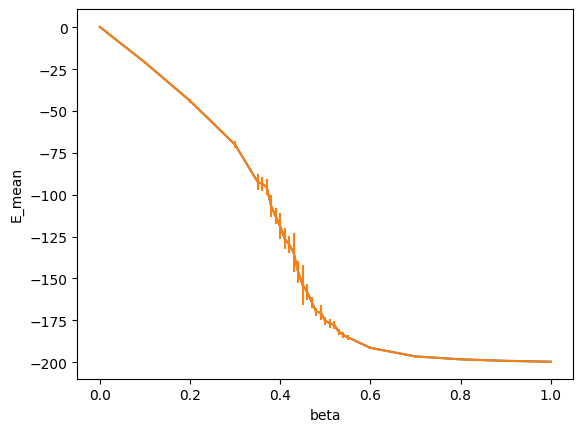

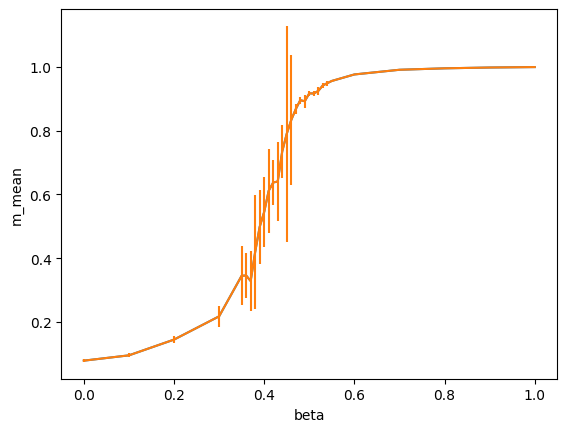

In [ ]:
L=10
t=100000
cut = 500

beta_list_1, E_m_list_1, m_m_list_1, E_std_list_1, m_std_list_1 = E_mean_m_mean_vs_beta(L,t,cut)

### L=20

0.00,0.10,0.20,0.30,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.60,0.70,0.80,0.90,1.00,
(0/30),tau 741
(1/30),tau 1101
(2/30),tau 1647
(3/30),tau 5616
(4/30),tau 17415
(5/30),tau 12975
(6/30),tau 11343
(7/30),tau 12696
(8/30),tau 12435
(9/30),tau 20895
(10/30),tau 19680
(11/30),tau 15741
(12/30),tau 14043
(13/30),tau 24324
(14/30),tau 6228
(15/30),tau 22080
(16/30),tau 22482
(17/30),tau 7527
(18/30),tau 16056
(19/30),tau 7620
(20/30),tau 7575
(21/30),tau 16335
(22/30),tau 3552
(23/30),tau 28269
(24/30),tau 5184
(25/30),tau 3111
(26/30),tau 3639
(27/30),tau 2934
(28/30),tau 1626
(29/30),tau 3168


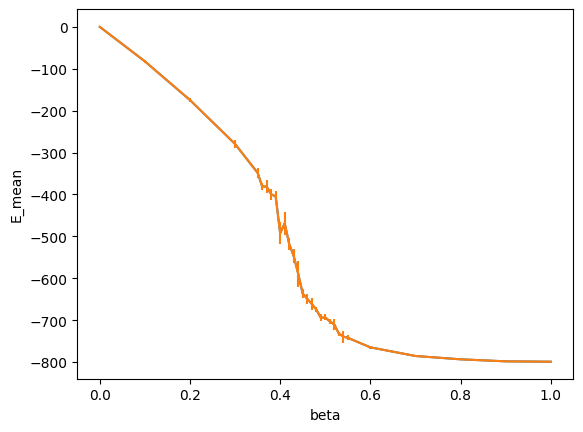

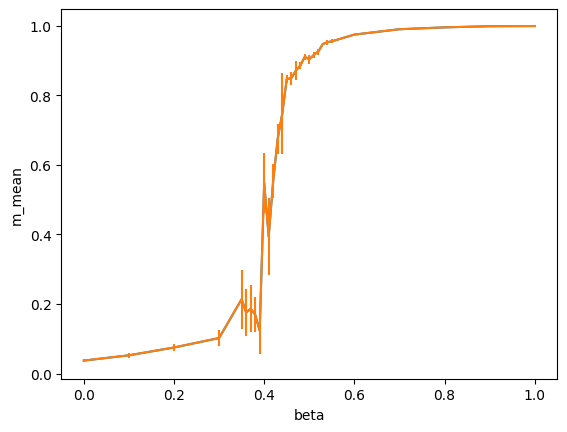

In [ ]:
L=20
t=100000
cut = 500

beta_list_2, E_m_list_2, m_m_list_2, E_std_list_2, m_std_list_2 = E_mean_m_mean_vs_beta(L,t,cut)

# L=5,10,20

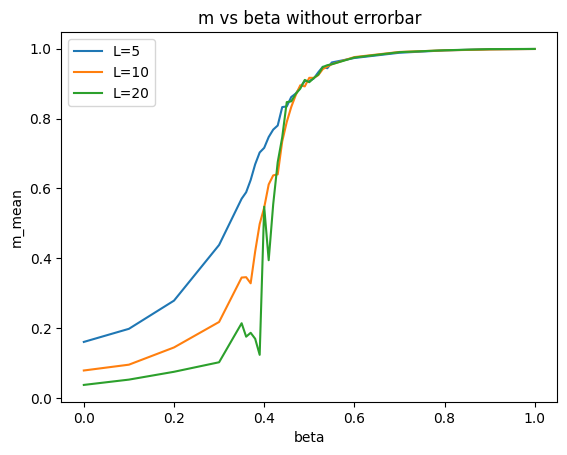

In [ ]:
plt.plot(beta_list_0, m_m_list_0, label='L=5')
plt.plot(beta_list_1, m_m_list_1, label='L=10')
plt.plot(beta_list_2, m_m_list_2, label='L=20')
plt.xlabel('beta')
plt.ylabel('m_mean')
plt.title('m vs beta without errorbar')
plt.legend()

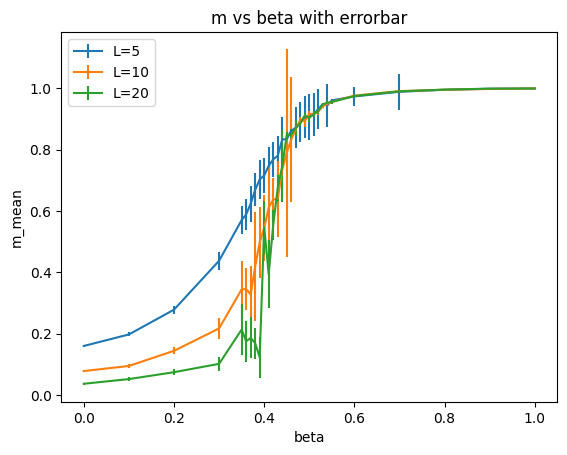

In [ ]:
plt.errorbar(beta_list_0, np.abs(m_m_list_0), m_std_list_0, label='L=5')
plt.errorbar(beta_list_1, np.abs(m_m_list_1), m_std_list_1, label='L=10')
plt.errorbar(beta_list_2, np.abs(m_m_list_2), m_std_list_2, label='L=20')
plt.xlabel('beta')
plt.ylabel('m_mean')
plt.title('m vs beta with errorbar')
plt.legend()